In [1]:
from __future__ import division
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
#from analytics_tools.analytics_tools3 import freq_discrete
%matplotlib inline

In [2]:
df = pd.read_excel('Data/churn.xlsx')

In [4]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [5]:
var_disc = [v for v in df.columns if v[:2]=='C_']
var_cont = [v for v in df.columns if v[:2]=='V_']

In [6]:
for v in var_disc:
    df[v] = (df[v]=='Yes').astype(int)

In [7]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,0,1,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,0,1,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,0,0,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,0,0,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,0,0,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [8]:
X = df[var_cont+var_disc].copy()
y = df['TARGET'].copy()

In [9]:
scaler = MinMaxScaler()
scaler.fit(X)
Xs = pd.DataFrame(scaler.transform(X),columns=X.columns)

In [10]:
Xs.head()

,V_ACCT_LGHT,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,C_IP,C_VMP
0,0.633880,0.581395,0.841885,0.489362,0.492640,0.377778,0.693383,0.166667,0.500000,0.166667,0.0,1.0
1,0.519126,0.604651,0.433248,0.531915,0.484789,0.511111,0.734390,0.166667,0.776243,0.166667,0.0,1.0
2,0.683060,0.000000,0.756211,0.606383,0.174681,0.522222,0.349487,0.333333,0.662983,0.000000,0.0,0.0
3,0.289617,0.000000,0.305085,0.319149,0.622179,0.600000,0.543336,0.416667,0.701657,0.666667,0.0,0.0
4,0.852459,0.000000,0.303924,0.191489,0.106968,0.788889,0.259087,0.083333,0.588398,0.166667,0.0,0.0


In [11]:
Xt,Xv,yt,yv = train_test_split(Xs,y,train_size=0.7)

In [17]:
model = SVC(probability=True)

In [18]:
%%time
model.fit(Xt,yt)

CPU times: user 506 ms, sys: 16.1 ms, total: 522 ms
Wall time: 520 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
def metricas(model,Xt,Xv,yt,yv):
    print "Accuracy_Train %.2f, Accuracy_Validate %.2f "%(accuracy_score(y_pred=model.predict(Xt),y_true=yt),accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print "ROC_Train %.2f, ROC_Validate %.2f "%(roc_auc_score(y_score=model.predict_proba(Xt)[:,1],y_true=yt),roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))


In [20]:
metricas(model,Xt,Xv,yt,yv)

Accuracy_Train 0.86, Accuracy_Validate 0.87 
ROC_Train 0.90, ROC_Validate 0.88 


In [25]:
param_grid = dict(kernel = ['linear', 'poly', 'rbf', 'sigmoid'],
                  degree = range(1,6),
                  gamma = np.arange(0.5,1,0.05),
                  coef0 = range(1,13),
                  decision_function_shape = ['ovo', 'ovr']
                )

In [30]:
grid = RandomizedSearchCV(cv=3,
                          verbose=True,
                          param_distributions=param_grid,
                          estimator=model,
                          n_jobs=-1,
                          n_iter=100,
                          scoring='roc_auc')

In [31]:
%%time
grid.fit(Xs,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.9min finished


CPU times: user 2.82 s, sys: 257 ms, total: 3.07 s
Wall time: 12min 57s


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'decision_function_shape': ['ovo', 'ovr'], 'coef0': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'gamma': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]), 'degree': [1, 2, 3, 4, 5], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=True)

In [32]:
grid.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=2,
  decision_function_shape='ovo', degree=4, gamma=0.8000000000000003,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
metricas(grid.best_estimator_,Xt,Xv,yt,yv)

Accuracy_Train 0.92, Accuracy_Validate 0.92 
ROC_Train 0.92, ROC_Validate 0.90 


(array([1405.,  238.,   48.,   32.,   35.,   31.,   27.,   27.,   45.,
          72.]),
 array([7.92598483e-04, 1.00712944e-01, 2.00633290e-01, 3.00553635e-01,
        4.00473981e-01, 5.00394327e-01, 6.00314672e-01, 7.00235018e-01,
        8.00155363e-01, 9.00075709e-01, 9.99996055e-01]),
 <a list of 10 Patch objects>)

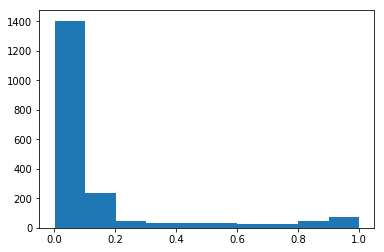

In [37]:
plt.hist(grid.best_estimator_.predict_proba(Xt)[:,1])